Eugenie Valerie Kamgue - SIE 510 GIS Applications with Python: Lab2 Creating basic geometry classes and accessing their properties and methods

1) Construct polygons from the given coordinate list called polygon_info. 

In [2]:
import arcpy

In [15]:
arcpy.env.overwriteOutput = True

polygon_info = [[[4,10],[14,10],[14,19.5],[7,22.5],[4,14]],[[10,10.5],[12,10.5],[12,13],[10,13]],[[16,16],[26,16.5],[26,23.5],[23,29],[16.5,29],[10.5,23],[16,20]],[[10,15],[20,25],[21,32],[12,33]]]

polys = [] # A list that will hold each of the Polygon objects
parray=arcpy.Array() # An array  to hold point objects
point=arcpy.Point()  # initialize a new point object
poly=arcpy.Polygon  # initialize a new polygon object
for apolygon in polygon_info:  # iterate through the polygon_info
    for coords in apolygon:
        point.X=coords[0]
        point.Y=coords[1]
        parray.append(point) # Append to the list of polygon objects
    poly=arcpy.Polygon(parray)
    polys.append(poly)
    parray.removeAll()
pcount = len(polys) # Count of the number of polygons in the list of polygons objects
print (pcount)

4


2) Access polygon properties and generate a nicely formatted print out of the following polygon
properties (area, point count, centroid, and extent). These are accessed with the dot notation.

In [13]:
print("Polygon properties:")
for apolygon in polys: # Iterate throug the polygon objects
    print()
    print(f" Area: {apolygon.area}")
    print(f" Point Count: {apolygon.pointCount}")
    print(f" Centroid: {apolygon.centroid.X, apolygon.centroid.Y}")
    print(f" Extent: {apolygon.extent.XMin, apolygon.extent.YMin, apolygon.extent.XMax, apolygon.extent.YMax}")

Polygon properties:

 Area: 101.75
 Point Count: 6
 Centroid: (9.226166296356727, 15.28022035041078)
 Extent: (4.0001220703125, 10.0001220703125, 14.0001220703125, 22.5001220703125)

 Area: 5.0
 Point Count: 5
 Centroid: (11.0001220703125, 11.7501220703125)
 Extent: (10.0001220703125, 10.5001220703125, 12.0001220703125, 13.0001220703125)

 Area: 142.5
 Point Count: 8
 Centroid: (19.62263669019554, 22.554215637563964)
 Extent: (10.5001220703125, 16.0001220703125, 26.0001220703125, 29.0001220703125)

 Area: 112.0
 Point Count: 5
 Centroid: (15.047741117931547, 25.952503022693453)
 Extent: (10.0001220703125, 15.0001220703125, 21.0001220703125, 33.0001220703125)


3) Save the polygons as a polygon shapefile.

In [5]:
# Persist a copy of the Polygon objects using CopyFeatures, save the polygons as a polygon shapefile
arcpy.CopyFeatures_management(polys, "C:/GISclass/polygons.shp")

<Result 'C:\\GISclass\\polygons.shp'>

4) Create a plot of the polygon shapefile

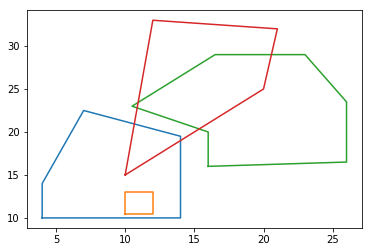

In [11]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("C:/GISclass/polygons.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

5) Compare polygons using the polygon method (overlaps) to determine if any of polygons overlap
and print out which if any polygons overlap (e.g. test whether polygon1 overlaps polygon2)

In [16]:
for i in range (len(polys)): #Iterate through the lenght of the polygon objects
    for j in range (len(polys)):
        if polys[i] .overlaps (polys [j]):
            print (i,j)
        else:
            print ("no overlap")
    print()

no overlap
no overlap
no overlap
0 3

no overlap
no overlap
no overlap
no overlap

no overlap
no overlap
no overlap
2 3

3 0
no overlap
3 2
no overlap

